In [1]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.io
from scipy import signal
# from mpl_toolkits.mplot3d import Axes3D
# import ipympl

In [2]:
# profile = np.load('../p5346_aperture.npz')['arr_0']
profile = scipy.io.loadmat('../perm-Clay/profi_composite_heights.mat')['profi_composite_heights']
profile[np.isnan(profile)] = np.nanmean(profile);
profile = np.rot90(profile, 2);

resolution = 11.758e-6

X_len = np.shape(profile)[0]
Y_len = np.shape(profile)[1]

np.shape(profile)

(3747, 2827)

In [3]:
ReduceFactor = 20;

RowLength = resolution * ReduceFactor;

In [4]:
X_redu = np.floor(X_len/ReduceFactor).astype(int)
Y_redu = np.floor(Y_len/ReduceFactor).astype(int)

X_redu, Y_redu

(187, 141)

In [5]:
def Reduction(profile, ext1, ext2):
    
    ReduceZ = np.zeros((X_redu, Y_redu))
    ReduceZ_oneRow = np.zeros((1, X_redu * Y_redu))
    ReduceX_oneRow = np.zeros((1, X_redu * Y_redu))
    ReduceY_oneRow = np.zeros((1, X_redu * Y_redu))
    
    k=-1;
    p=-1;

    for aa in range(0,X_redu):
        k = k+1
        l = -1

        for bb in range(0,Y_redu):
            l = l+1
            p = p+1
            locationk = (aa)*ReduceFactor+1;
            locationl = (bb)*ReduceFactor+1;
            ReduceZ[k,l] = np.mean(np.mean(profile[locationk:locationk+7,locationl:locationl+7]));
            ReduceZ_oneRow[0,p] = np.mean(np.mean(profile[locationk:locationk+7,locationl:locationl+7]));
            ReduceX_oneRow[0,p] = l*RowLength
            ReduceY_oneRow[0,p] = k*RowLength

    return ReduceZ, ReduceZ_oneRow, ReduceX_oneRow, ReduceY_oneRow

In [6]:
ReduceZ, ReduceZ_oneRow, ReduceX_oneRow, ReduceY_oneRow = Reduction(profile, X_redu, Y_redu)

In [7]:
ReduceZ = ReduceZ.T/1e3

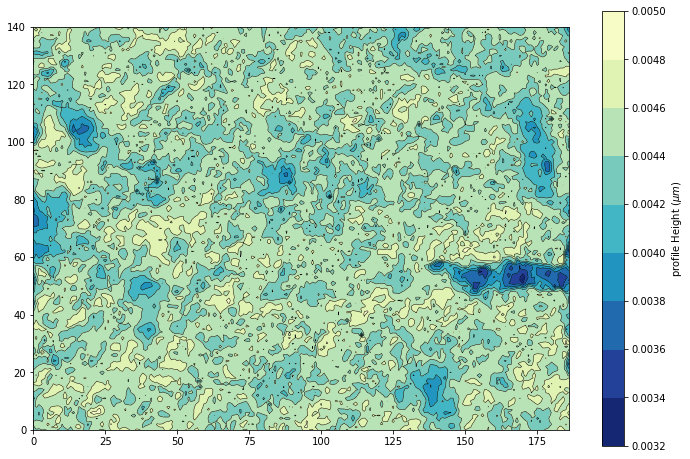

In [8]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_aspect(1)

ax.contour(ReduceZ, levels=8, linewidths=0.5, colors='k')
pos = ax.contourf(ReduceZ, levels=8, cmap='YlGnBu_r')
fig.colorbar(pos,label='profile Height $(\mu m)$')

# plt.ylabel('Length (mm)',size=20)
# plt.xlabel('Width (mm)',size=20)
plt.show()

In [9]:
# fig = plt.figure(figsize=(12,8))
# ax = fig.add_subplot(111)
# ax.contour(profile.T, levels=10, linewidths=0.5, colors='k')
# pos = ax.contourf(profile.T, levels=10, cmap='winter')
# fig.colorbar(pos,label='profile Height $(\mu m)$')
# ax.set_aspect(1)
# # plt.ylabel('Length (mm)',size=6)
# # plt.xlabel('Width (mm)',size=6)
# plt.show()

In [10]:
np.savez('../p5346_PermTest.npz', ReduceZ, ReduceFactor, resolution, X_len, Y_len)

In [11]:
# ReduceZMat = scipy.io.loadmat('../perm-Clay/PermTest.mat')['ReduceZ']

In [12]:
# fig = plt.figure(figsize=(12,8))
# ax = fig.add_subplot(111)
# ax.set_aspect(1)

# # ax.contour(ReduceZ - ReduceZMat, levels=20, linewidths=0.5, colors='k')
# pos = ax.contourf(ReduceZ - ReduceZMat, levels=100, cmap='winter')
# fig.colorbar(pos,label='profile Height $(\mu m)$')

# # plt.ylabel('Length (mm)',size=20)
# # plt.xlabel('Width (mm)',size=20)
# plt.show()